## Atiku and Buhari's sentiment analysis from 2000 tweets

### Project steps
1. Import the python dependencies
2. Load the tweets of the two candidates to be predicted
3. Explore and clean them
4. Load the training dataset and explore it 
5. The tweets data already has sentiments predicted by the textblob package, ("maybe i will do this, maybe not...i'm still deciding",map from -0.09 to 0.09 as neutral, above 0.09 as positive and below -0.09 as negative). This is to compare the textblob predictions and my classifier's predictions [Note: the mapping is my decision]
6. train test split of the sentiment data
7. Count vectorizing
8. Train classifer, predict and evaluate performance (Machine learning )
9. Optimize the performance of the classifier 
10. After evaluations and improvements, then use cross validaton to get the true reality of performance for out of sample data
11. Apply the classifer to the two tweets and create a dataframe with the predictions
12. Explore the predictions done by your classifer and intuitively check the accuracy
13. Visualizations of the people's sentiments of the two candidates 

##### Import the dependencies

In [1]:
import pandas as pd
import numpy as np
from __future__ import print_function, division
import textblob
import tweepy
from sklearn import utils
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Load the tweets of the two candidates

In [2]:
atiku_df = pd.read_csv("Atiku_2000_tweets.csv")
buhari_df = pd.read_csv("Buhari_2000_tweets.csv")

In [3]:
# Quick exploration
atiku_df.head(30)

,Unnamed: 0,tweets,polarity
0,0,@falusteelgmail1 @Nsa20 @SpokesManAtiku @atiku,0.000000
1,1,RT @Angelmichael10s: Nigerian youths are daft ...,-0.200000
2,2,RT @Yan_biyu_: Retweet for Buhari @MBuhari and...,0.000000
3,3,RT @Nigerianey: POLL: @Mbuhari or @atiku \r\n\...,0.000000
4,4,@occp1967 @Jani4Tijani While you wasted the wh...,0.050000
5,5,@Daulahotel @SpokesManAtiku @atiku Now you mon...,-0.200000
6,6,RT @SusanHenshaw50: Hear Atiku has put down a ...,0.181481
7,7,RT @Yan_biyu_: Retweet for Buhari @MBuhari and...,0.000000
8,8,RT @SpokesManAtiku: Reports in the media that ...,-0.400000
9,9,RT @Intergrity56: They are saying @ProfOsinbaj...,-0.187500


In [4]:
atiku_df.loc[1, "tweets"]

'RT @Angelmichael10s: Nigerian youths are daft and in a few years we gonna be crucifying Atiku if he makes it up there. 4 years ago they was'

In [5]:
atiku_df.loc[14, "tweets"]

'RT @AbdullShitu: 1.There is need for a paradigm shift in the way our great country have been governed for more than 3 years. His administra'

In [6]:
buhari_df.head(30)

,Unnamed: 0,tweets,polarity
0,0,RT @MAZIOBIBOND1: President Buhari is the dire...,0.300000
1,1,Cehennem nefse ho gelen eylerle kuatlp rtlmtr....,0.000000
2,2,@Pharge1 @JohnGra60799908 @adeyanjudeji Buhari...,0.000000
3,3,@ogundamisi @MBuhari @ProfOsinbajo Even with t...,0.000000
4,4,RT @ngoziperpee: Only a country populated by s...,0.000000
5,5,@toluogunlesi Tolu your lifeless president Buh...,-0.316667
6,6,"RT @ckorie17: Waw waw waw! Jubril (Buhari), no...",0.000000
7,7,RT @DailyPostNGR: 2019: Tinubu made a foolish ...,0.000000
8,8,"RT @tosinadeda: Look at these pictures, they a...",0.000000
9,9,RT @Yan_biyu_: Retweet for Buhari @MBuhari and...,0.000000


In [7]:
buhari_df.loc[13, "tweets"]

'RT @modebolanle: President Donald Trump has been standing there, fielding questions from journalists for close to one and a half hours.\r\n\r\nWh'

In [8]:
buhari_df.loc[28, "tweets"]

'RT @cbngov_akin1: "Buhari integrity is fake"\r\n\r\n"Tinubu must leave Buhari, I know he\'s not happy with Buhari, he must summon courage to aband'

##### Clean up dataframe

In [9]:
# First let us remove the unnamed column which was an oversight I made when converting DF to_csv

atiku_df = atiku_df.loc[:, ["tweets", "polarity"]]
buhari_df = buhari_df.loc[:, ["tweets", "polarity"]]

In [10]:
buhari_df.head()

,tweets,polarity
0,RT @MAZIOBIBOND1: President Buhari is the dire...,0.3
1,Cehennem nefse ho gelen eylerle kuatlp rtlmtr....,0.0
2,@Pharge1 @JohnGra60799908 @adeyanjudeji Buhari...,0.0
3,@ogundamisi @MBuhari @ProfOsinbajo Even with t...,0.0
4,RT @ngoziperpee: Only a country populated by s...,0.0


In [11]:
atiku_df.head()

,tweets,polarity
0,@falusteelgmail1 @Nsa20 @SpokesManAtiku @atiku,0.00
1,RT @Angelmichael10s: Nigerian youths are daft ...,-0.20
2,RT @Yan_biyu_: Retweet for Buhari @MBuhari and...,0.00
3,RT @Nigerianey: POLL: @Mbuhari or @atiku \r\n\...,0.00
4,@occp1967 @Jani4Tijani While you wasted the wh...,0.05


In [12]:
# remove the RT, @user because they have no effect on the sentiment of the tweet, RT means retweet
atiku_df["tweets"] = atiku_df.tweets.str.replace(r'@[\w]+', "").str.replace(r'RT', "")
buhari_df["tweets"] = buhari_df.tweets.str.replace(r'@[\w]+', "").str.replace(r'RT', "")

In [13]:
buhari_df.head()

,tweets,polarity
0,: President Buhari is the direct founder and ...,0.3
1,Cehennem nefse ho gelen eylerle kuatlp rtlmtr....,0.0
2,Buhari Oleeeeeee\r\nBuhari Oleeeeeee\r\nBuh...,0.0
3,"Even with this killings, insecurity, herdsm...",0.0
4,: Only a country populated by sub-humans wil ...,0.0


In [14]:
atiku_df.head()

,tweets,polarity
0,,0.00
1,: Nigerian youths are daft and in a few years...,-0.20
2,: Retweet for Buhari and like for Atiku htt...,0.00
3,: POLL: or \r\n\r\nIf Nigeria's Presidentia...,0.00
4,While you wasted the whole 3 1/2 years witho...,0.05


In [15]:
# remove links from the tweets because links also have no effect on sentiments
atiku_df["tweets"] = atiku_df.tweets.str.replace(r'https?://[\w\./]*', "")
buhari_df["tweets"] = buhari_df.tweets.str.replace(r'https?://[\w\./]*', "")

In [16]:
# this is incase i write a story about this, for non data science readers, head means top 5 rows
buhari_df.head()

,tweets,polarity
0,: President Buhari is the direct founder and ...,0.3
1,Cehennem nefse ho gelen eylerle kuatlp rtlmtr....,0.0
2,Buhari Oleeeeeee\r\nBuhari Oleeeeeee\r\nBuh...,0.0
3,"Even with this killings, insecurity, herdsm...",0.0
4,: Only a country populated by sub-humans wil ...,0.0


In [17]:
# remove any character that is not text except #
atiku_df["tweets"] = atiku_df.tweets.str.replace(r'[^a-zA-Z#]', " ")

In [18]:
buhari_df["tweets"] = buhari_df.tweets.str.replace(r'[^a-zA-Z#]', " ") # for buhari

We have finished cleaning the tweets of the two candidates, I will dive straight in to the analysis

##### Load the training dataset and explore

In [19]:
train_df = pd.read_csv("complete_sentiment_training_data.csv")
train_df.head()

,Unnamed: 0,Text,Polarity
0,0,What said about movie about cross dressing gan...,-1
1,1,independent indie film might Black White Toile...,0
2,2,Having missed Project Greenlight movie Stolen ...,0
3,3,Anne Parillaud phenomenal terrifyingly vulnera...,0
4,4,part while other happy know what want what fee...,-1


In [20]:
# Clean and explore
train_df = train_df.loc[:, ["Text", "Polarity"]]

In [21]:
# check the number of observations
train_df.shape

(202893, 2)

In [22]:
# check the Polarity distribution (How many positives(1), how many neutrals (0), how many negatives(-1)
train_df.Polarity.value_counts()

 1    74666
-1    74160
 0    54067
Name: Polarity, dtype: int64

In [23]:
print("The distribution of neutrals is ", 
      (train_df.Polarity.value_counts()[0]/train_df.Polarity.value_counts().sum())*100, "% of the dataset")

The distribution of neutrals is  26.648036157 % of the dataset


In [24]:
print("The distribution of positives is ", 
      (train_df.Polarity.value_counts()[1]/train_df.Polarity.value_counts().sum())*100, "% of the dataset")

The distribution of positives is  36.80067819 % of the dataset


In [25]:
print("The distribution of negatives is ", 
      (train_df.Polarity.value_counts()[-1]/train_df.Polarity.value_counts().sum())*100, "% of the dataset")

The distribution of negatives is  36.551285653 % of the dataset


In [26]:
train_df.head(50)

,Text,Polarity
0,What said about movie about cross dressing gan...,-1
1,independent indie film might Black White Toile...,0
2,Having missed Project Greenlight movie Stolen ...,0
3,Anne Parillaud phenomenal terrifyingly vulnera...,0
4,part while other happy know what want what fee...,-1
5,after arriving flight scheduled depart doors c...,-1
6,shower vote tweet life good,1
7,first most this movie sucks about minutes funn...,0
8,pins needles dizzy going down before faint,-1
9,misfortune seeing movie SciFi channel just day...,0


##### train test split of the sentiment data

In [27]:
train_df["Text"] = train_df.Text.apply(lambda x: str(x))  # convert the data  type to strings

In [28]:
# First I'll create the feature vector and response vector
X = train_df.loc[:, "Text"]
y = train_df.loc[:, "Polarity"]

print("The shape of X is ",X.shape)
print("The shape of y is ",y.shape)

The shape of X is  (202893L,)
The shape of y is  (202893L,)


In [29]:
X.head()

0    What said about movie about cross dressing gan...
1    independent indie film might Black White Toile...
2    Having missed Project Greenlight movie Stolen ...
3    Anne Parillaud phenomenal terrifyingly vulnera...
4    part while other happy know what want what fee...
Name: Text, dtype: object

In [30]:
y.head()

0   -1
1    0
2    0
3    0
4   -1
Name: Polarity, dtype: int64

In [31]:
# Train_test split

# This is the class that will be used to divide the dataset into training and testing data
from sklearn import cross_validation  

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state = 1)

In [32]:
print("The shape of X_train is ",X_train.shape)
print("The shape of X_test is ",X_test.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of y_test is ",y_test.shape)

The shape of X_train is  (152169L,)
The shape of X_test is  (50724L,)
The shape of y_train is  (152169L,)
The shape of y_test is  (50724L,)


##### Count vectorize

In [33]:
# Import from sklearn 
from sklearn.feature_extraction import text

In [34]:
# instantiate
vect = text.CountVectorizer(decode_error="ignore")

# fit and transform
X_train_dtm = vect.fit_transform(X_train)

In [35]:
X_train_dtm.shape

(152169, 137134)

In [36]:
X_test_dtm = vect.transform(X_test)

In [37]:
X_test_dtm.shape

(50724, 137134)

##### Machine Learning

In [38]:
# Import
from sklearn import naive_bayes

# Instantiate
nb = naive_bayes.MultinomialNB()

# fit
nb.fit(X_train_dtm, y_train)

# predict
y_pred_nb = nb.predict(X_test_dtm)

##### Model Evaluation

In [39]:
from sklearn import metrics
print("The classification accuracy is ",metrics.accuracy_score(y_test, y_pred_nb))

The classification accuracy is  0.661521173409


In [40]:
# Import
from sklearn import naive_bayes

# Instantiate
bn = naive_bayes.BernoulliNB()

# fit
bn.fit(X_train_dtm, y_train)

# predict
y_pred_bn = bn.predict(X_test_dtm)

print("The classification accuracy is ",metrics.accuracy_score(y_test, y_pred_bn))

The classification accuracy is  0.53749704282


In [41]:
# choosing the first pipeline, let me now do cross validation
# instantiate
vect = text.CountVectorizer(decode_error="ignore")

# fit and transform
X_dtm = vect.fit_transform(X)

print(cross_validation.cross_val_score(nb, X_dtm, y, cv=10, scoring="accuracy").mean())

0.66630678635


##### Apply classifer to both atiku's data and buhari's data


In [42]:
# ATIKU
atiku_x = atiku_df.loc[:, "tweets"]


# Buhari
buhari_x = buhari_df.loc[:, "tweets"]

In [43]:
# vecorize
atiku_x_dtm = vect.transform(atiku_x)
buhari_x_dtm = vect.transform(buhari_x)

In [44]:
atiku_x_dtm.shape

(2000, 156678)

In [45]:
buhari_x_dtm.shape

(2000, 156678)

In [46]:
X_dtm.shape

(202893, 156678)

In [47]:
# Machine learning
nb = naive_bayes.MultinomialNB()
nb.fit(X_dtm, y)
atiku_pred = nb.predict(atiku_x_dtm)
buhari_pred = nb.predict(buhari_x_dtm)

In [48]:
type(atiku_pred)

numpy.ndarray

In [49]:
atiku_pred_series = pd.Series(atiku_pred)

In [50]:
buhari_pred_series = pd.Series(buhari_pred)

In [51]:
atiku_predicted_df = pd.concat([atiku_df, atiku_pred_series], axis=1)
buhari_predicted_df = pd.concat([buhari_df, buhari_pred_series], axis=1)

In [52]:
buhari_predicted_df

,tweets,polarity,0
0,President Buhari is the direct founder and ...,0.300000,1
1,Cehennem nefse ho gelen eylerle kuatlp rtlmtr ...,0.000000,-1
2,Buhari Oleeeeeee Buhari Oleeeeeee Buhari ...,0.000000,1
3,Even with this killings insecurity herdsm...,0.000000,0
4,Only a country populated by sub humans wil ...,0.000000,-1
5,Tolu your lifeless president Buhari is a fail...,-0.316667,-1
6,Waw waw waw Jubril Buhari now have Ak...,0.000000,1
7,Tinubu made a foolish mistake with Bu...,0.000000,-1
8,Look at these pictures they are Nigerians ...,0.000000,1
9,Retweet for Buhari and like for Atiku,0.000000,1


In [58]:
atiku_predicted_df.head()

,tweets,polarity,my_prediction
0,,0.00,1
1,Nigerian youths are daft and in a few years...,-0.20,1
2,Retweet for Buhari and like for Atiku,0.00,1
3,POLL or If Nigeria s Presidential El...,0.00,1
4,While you wasted the whole years witho...,0.05,1


In [53]:
atiku_predicted_df.columns = ["tweets", "polarity", "my_prediction"]
buhari_predicted_df.columns = ["tweets", "polarity", "my_prediction"]

##### Visualization

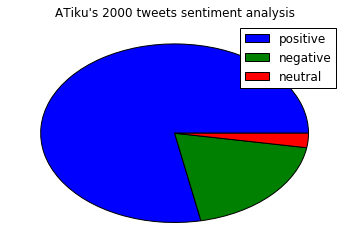

In [54]:
# ATiku
patches, text = plt.pie(atiku_predicted_df.my_prediction.value_counts())
plt.legend(patches, ["positive", "negative", "neutral"])
plt.title("ATiku's 2000 tweets sentiment analysis")
plt.show()

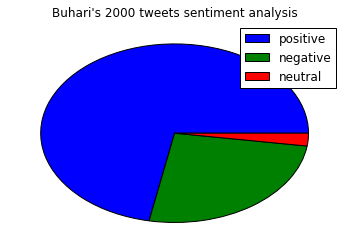

In [55]:
# Buhari
patches, text = plt.pie(buhari_predicted_df.my_prediction.value_counts())
plt.legend(patches, ["positive", "negative", "neutral"])
plt.title("Buhari's 2000 tweets sentiment analysis")
plt.show()

In [56]:
# ATiku's percentage sentiment
print("The distribution of neutrals is ", 
      (atiku_predicted_df.my_prediction.value_counts()[0]/atiku_predicted_df.my_prediction.value_counts().sum())*100, "% of the dataset")

print("The distribution of positives is ", 
      (atiku_predicted_df.my_prediction.value_counts()[1]/atiku_predicted_df.my_prediction.value_counts().sum())*100, "% of the dataset")

print("The distribution of negatives is ", 
      (atiku_predicted_df.my_prediction.value_counts()[-1]/atiku_predicted_df.my_prediction.value_counts().sum())*100, "% of the dataset")

The distribution of neutrals is  2.6 % of the dataset
The distribution of positives is  78.15 % of the dataset
The distribution of negatives is  19.25 % of the dataset


In [57]:
# Buhari's percentage sentiment
print("The distribution of neutrals is ", 
      (buhari_predicted_df.my_prediction.value_counts()[0]/buhari_predicted_df.my_prediction.value_counts().sum())*100, "% of the dataset")

print("The distribution of positives is ", 
      (buhari_predicted_df.my_prediction.value_counts()[1]/buhari_predicted_df.my_prediction.value_counts().sum())*100, "% of the dataset")

print("The distribution of negatives is ", 
      (buhari_predicted_df.my_prediction.value_counts()[-1]/buhari_predicted_df.my_prediction.value_counts().sum())*100, "% of the dataset")

The distribution of neutrals is  2.3 % of the dataset
The distribution of positives is  71.95 % of the dataset
The distribution of negatives is  25.75 % of the dataset


In [94]:
# Atiku's analysis
#Now let me analyze using textblob and check the difference
positives = 0
negatives = 0
neutrals = 0

for i in range(len(atiku_predicted_df.polarity)):
    if atiku_predicted_df.loc[i, "polarity"] > 0:
        positives = positives + 1
        positives = float(positives)
    elif atiku_predicted_df.loc[i, "polarity"] < 0:
            negatives = negatives + 1
            negatives = float(negatives)
    elif atiku_predicted_df.loc[i, "polarity"] == 0:
             neutrals = neutrals + 1
             neutrals = float(neutrals)
    

In [95]:
positives

440.0

In [96]:
negatives

363.0

In [97]:
neutrals

1197.0

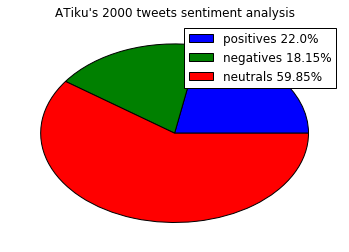

In [98]:
# Atiku Pie chart of the textblob analysis
# ATiku
patches, text = plt.pie([positives, negatives, neutrals])
plt.legend(patches, ["positives " + str((positives/2000)*100) + "%", 
                     "negatives " + str((negatives/2000)*100) + "%", 
                     "neutrals " + str((neutrals/2000)*100) + "%"])
plt.title("ATiku's 2000 tweets sentiment analysis")
plt.show()

In [99]:
# Buhari's analysis
# Now let me analyze using textblob and check the difference
positives = 0
negatives = 0
neutrals = 0

for i in range(len(buhari_predicted_df.polarity)):
    if buhari_predicted_df.loc[i, "polarity"] > 0:
        positives = positives + 1
        positives = float(positives)
    elif buhari_predicted_df.loc[i, "polarity"] < 0:
            negatives = negatives + 1
            negatives = float(negatives)
    elif buhari_predicted_df.loc[i, "polarity"] == 0:
             neutrals = neutrals + 1
             neutrals = float(neutrals)
    

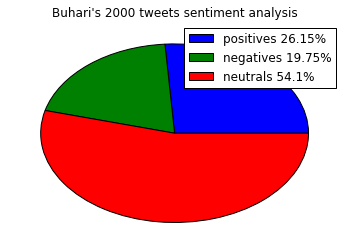

In [100]:
# Buhari's Pie chart of the textblob analysis
# Buhari
patches, text = plt.pie([positives, negatives, neutrals])
plt.legend(patches, ["positives " + str((positives/2000)*100) + "%", 
                     "negatives " + str((negatives/2000)*100) + "%",
                     "neutrals " + str((neutrals/2000)*100) + "%"])
plt.title("Buhari's 2000 tweets sentiment analysis")
plt.show()